Tenemos un dataset con datos históricos de varias variables promediadas en valores diarios de 6 los últimos 6 años.

Se tiene el siguiente diccionario de datos:
- La columna de índice es la fecha.
- PresionAire: es la presión del aire en milibars
- PresionVapor: es la presión del vapor de agua en el aire en milibars
- Humedadrelativa: es el porcentaje de humedad relativa
- ConcentracionVapor: es la concentración del vapor de agua en mmol/mol
- DensidadAire: es la densidad del aire en g/metros cúbicos
- DireccionViento: es la dirección del viento en grados
- Temperatura: es la temperatura en grados centigrados

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import math as mt

from sklearn.decomposition import PCA
from sklearn import preprocessing

'0.23.2'

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [ ]:
# Imprima 4 filas del inicio y 4 al final
pd.set_option('display.max_rows', 8)

In [3]:
df = pd.read_csv("datos_clima.csv")

In [4]:
# Se verifica la carga
df

,Unnamed: 0,PresionAire (mbar),PresionVapor (mbar),HumedadRelativa (%),ConcentracionVapor (mmol/mol),DensidadAire (g/m**3),DireccionViento (grado),Temperatura (C)
0,01.01.2010,970.000208,4.348264,94.777778,4.483333,1252.657986,64.320278,-3.863403
1,02.01.2010,985.915486,3.793889,91.520833,3.849444,1280.425208,238.964236,-5.296667
2,03.01.2010,990.590625,4.049236,92.757639,4.087569,1283.044514,132.256944,-4.605903
3,04.01.2010,988.882014,3.467292,90.650694,3.505417,1289.135417,145.993472,-6.284306
4,05.01.2010,981.295347,2.385556,85.181528,2.431111,1299.386597,165.373125,-10.286736
...,...,...,...,...,...,...,...,...
2188,27.12.2015,1002.411250,8.530347,79.140625,8.510764,1237.405625,190.177083,8.167083
2189,28.12.2015,1002.468194,7.347917,91.898611,7.329375,1257.736389,153.824792,3.761111
2190,29.12.2015,1003.816736,7.504514,94.815278,7.478403,1260.613194,187.764653,3.485625
2191,30.12.2015,998.772639,4.638125,67.657431,4.641250,1265.083611,178.779861,1.395694


In [5]:
# se verifican los tipos
df.dtypes

Unnamed: 0                        object
PresionAire (mbar)               float64
PresionVapor (mbar)              float64
HumedadRelativa (%)              float64
ConcentracionVapor (mmol/mol)    float64
DensidadAire (g/m**3)            float64
DireccionViento (grado)          float64
Temperatura (C)                  float64
dtype: object

<h1>Preparación general de los datos

- Renombramiento de columnas
- Conversión de columnas tipos fechas
- Ordenamiento por fechas
- Redondeo de los valores
- Revisión de la calidad de los datos

In [6]:
df.columns = ['Fecha', 'P.Aire', 'P.Vapor', 'Hum.Rel', 'C.Vapor', 'D.Aire', 'D.Vapor', 'Temp']

In [7]:
# se cambia el tipo de la columna 0 a Date
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d.%m.%Y');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    2193 non-null   datetime64[ns]
 1   P.Aire   2193 non-null   float64       
 2   P.Vapor  2193 non-null   float64       
 3   Hum.Rel  2193 non-null   float64       
 4   C.Vapor  2193 non-null   float64       
 5   D.Aire   2193 non-null   float64       
 6   D.Vapor  2193 non-null   float64       
 7   Temp     2193 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 137.2 KB


In [8]:
# Ordenamiento del dataframe
df.sort_values(by=['Fecha'])

,Fecha,P.Aire,P.Vapor,Hum.Rel,C.Vapor,D.Aire,D.Vapor,Temp
0,2010-01-01,970.000208,4.348264,94.777778,4.483333,1252.657986,64.320278,-3.863403
1,2010-01-02,985.915486,3.793889,91.520833,3.849444,1280.425208,238.964236,-5.296667
2,2010-01-03,990.590625,4.049236,92.757639,4.087569,1283.044514,132.256944,-4.605903
3,2010-01-04,988.882014,3.467292,90.650694,3.505417,1289.135417,145.993472,-6.284306
4,2010-01-05,981.295347,2.385556,85.181528,2.431111,1299.386597,165.373125,-10.286736
...,...,...,...,...,...,...,...,...
2188,2015-12-27,1002.411250,8.530347,79.140625,8.510764,1237.405625,190.177083,8.167083
2189,2015-12-28,1002.468194,7.347917,91.898611,7.329375,1257.736389,153.824792,3.761111
2190,2015-12-29,1003.816736,7.504514,94.815278,7.478403,1260.613194,187.764653,3.485625
2191,2015-12-30,998.772639,4.638125,67.657431,4.641250,1265.083611,178.779861,1.395694


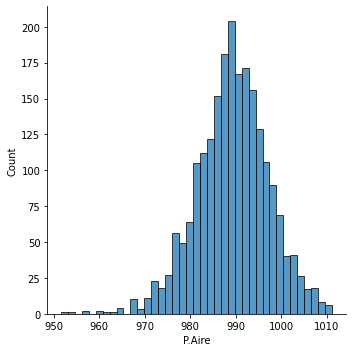

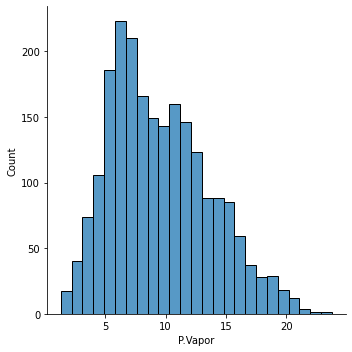

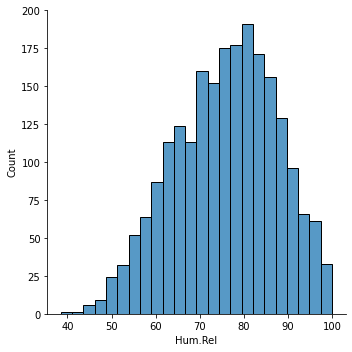

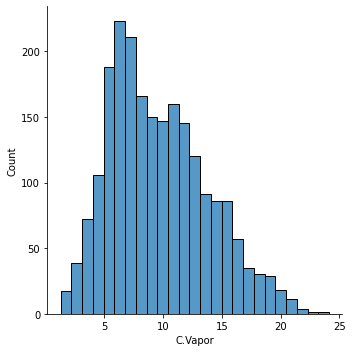

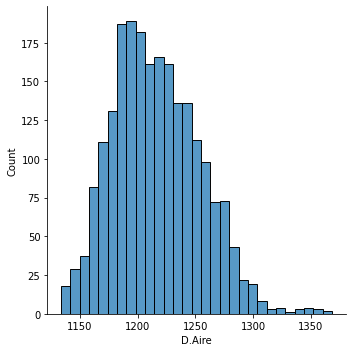

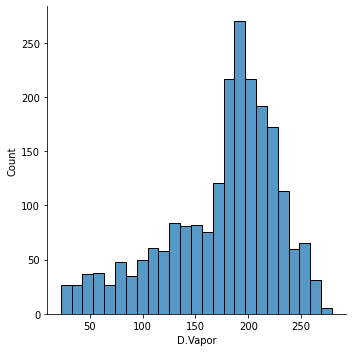

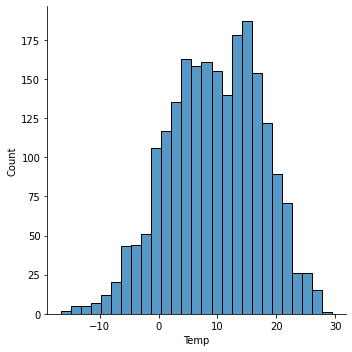

In [9]:
import matplotlib.pyplot as plt
for col in df.columns[1:]:
    df[col] = df[col].round(decimals=2) # Redondeo de los valores a 2 decimales
    sns.displot(df, x=col)

In [10]:
df.describe()

,P.Aire,P.Vapor,Hum.Rel,C.Vapor,D.Aire,D.Vapor,Temp
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,989.291952,9.528664,75.839558,9.635121,1216.120219,174.249950,9.462321
std,7.913174,4.106531,11.592708,4.157923,37.622388,54.484004,7.861140
min,951.560000,1.300000,38.500000,1.290000,1133.430000,22.570000,-16.580000
25%,984.380000,6.280000,67.520000,6.340000,1188.260000,141.960000,3.900000
50%,989.460000,8.910000,76.750000,8.980000,1212.650000,187.760000,9.720000
75%,994.390000,12.230000,84.440000,12.360000,1242.080000,211.460000,15.360000
max,1011.200000,23.800000,100.000000,24.120000,1368.360000,279.370000,29.450000


Se busca ahora comenzar a generar el corte transversal, haciendo variables promedio: 

# Parte 1: Modelos shallow (3 puntos)

Utilizando modelos shallow (por oposición a profundos), desarrolle modelos predictivos que permitan predecir la temperatura del séptimo día siguiente:

- No utilice modelos de forecasting como ARIMA o Holt-Winters
- Establezca variables a partir de los datos históricos. Por ejemplo, puede establecer datos como la temperatura promedio de los últimos 3 días, de los últimos 7 días, de los últimos 10 días, la presión del aire mínima de los últimos 3 días, de los últimos 7 días, de los últimos 15 días, los valores del día anterior de todas las variables, lo valores de hace 1 año en la misma fecha, etc.
- Debe crear un dataset de corte transversal, estimando las variables a utilizar cada día, o cada semana, o cada mes.
- Utilice modelos como SVM y redes neuronales artificiales tradicionales
- Utilice técnicas de seleccion de variables como PCA, LDA y Lasso
- Intente aplicar diferentes técnicas de normalización

<h2>Creación de los data sets

- Datos de entrenamiento: equivalen a los registros ubicados en el 80% inicial del dataframe
- Datos de validación: equivalen a los valores rango entre el 80% y 90% de los datos
- Datos de validación: equivalen a los valores superiores al 90% de los datos


In [130]:
train_limit = mt.ceil(len(df)*0.8)
print(train_limit)
df1_train = df.iloc[:train_limit,:]

train_limit_val = mt.ceil(len(df)*0.9)

df1_validation = df.iloc[train_limit:train_limit_val,:]
df1_test = df.iloc[train_limit_val:,:]

print(df1_train.head())
print(df1_validation.head())
print(df1_test.head())

1755
       Fecha  P.Aire  P.Vapor  Hum.Rel  C.Vapor   D.Aire  D.Vapor   Temp
0 2010-01-01  970.00     4.35    94.78     4.48  1252.66    64.32  -3.86
1 2010-01-02  985.92     3.79    91.52     3.85  1280.43   238.96  -5.30
2 2010-01-03  990.59     4.05    92.76     4.09  1283.04   132.26  -4.61
3 2010-01-04  988.88     3.47    90.65     3.51  1289.14   145.99  -6.28
4 2010-01-05  981.30     2.39    85.18     2.43  1299.39   165.37 -10.29
          Fecha  P.Aire  P.Vapor  Hum.Rel  C.Vapor   D.Aire  D.Vapor   Temp
1755 2014-10-20  987.44    10.41    75.88    10.54  1202.17   217.34  11.87
1756 2014-10-21  978.66     9.38    78.01     9.59  1201.06   231.42   9.71
1757 2014-10-22  987.44     9.58    91.11     9.70  1220.38   258.20   7.68
1758 2014-10-23  996.90     9.97    89.20    10.00  1227.83   202.30   8.62
1759 2014-10-24  994.35     9.29    83.58     9.34  1224.77   187.61   8.70
          Fecha  P.Aire  P.Vapor  Hum.Rel  C.Vapor   D.Aire  D.Vapor   Temp
1974 2015-05-27  993.50  

In [131]:
ventana = 7
# Media Movil para presión de aire
for dfs in [df1_train, df1_validation, df1_test]:
    for col in dfs.columns[1:]:
        prom = dfs[col].rolling(window=ventana).mean()
        nom_col = col + '.Prom'
        dfs[nom_col] = prom
        max  = dfs[col].rolling(window=ventana).max()
        nom_col = col + '.Max'
        dfs[nom_col] = max
        min  = dfs[col].rolling(window=ventana).min()
        nom_col = col + '.Min'
        dfs[nom_col] = min

In [132]:
df1_train.info()
df1_validation.info()
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         1755 non-null   datetime64[ns]
 1   P.Aire        1755 non-null   float64       
 2   P.Vapor       1755 non-null   float64       
 3   Hum.Rel       1755 non-null   float64       
 4   C.Vapor       1755 non-null   float64       
 5   D.Aire        1755 non-null   float64       
 6   D.Vapor       1755 non-null   float64       
 7   Temp          1755 non-null   float64       
 8   P.Aire.Prom   1749 non-null   float64       
 9   P.Aire.Max    1749 non-null   float64       
 10  P.Aire.Min    1749 non-null   float64       
 11  P.Vapor.Prom  1749 non-null   float64       
 12  P.Vapor.Max   1749 non-null   float64       
 13  P.Vapor.Min   1749 non-null   float64       
 14  Hum.Rel.Prom  1749 non-null   float64       
 15  Hum.Rel.Max   1749 non-null   float64 

<h2>Limpieza de datos

- Eliminar los registros con variables nulas
- Eliminar las columnas de los datos inicianales, se conservan la temperatura (variable independiente) y las columnas calculadas (Prom, Min, Max) 

In [133]:
df1_train.dropna(inplace=True)
df1_validation.dropna(inplace=True)
df1_test.dropna(inplace=True)

print(df1_train.head())
print(df1_validation.head())
print(df1_test.head())


        Fecha  P.Aire  P.Vapor  Hum.Rel  C.Vapor   D.Aire  D.Vapor  Temp  \
6  2010-01-07  983.51     2.76    85.05     2.81  1292.73   181.51 -8.39   
7  2010-01-08  989.72     2.74    90.78     2.77  1306.17    54.41 -9.46   
8  2010-01-09  984.62     3.75    90.97     3.81  1278.59    31.43 -5.28   
9  2010-01-10  985.60     3.84    92.40     3.89  1279.35    57.72 -5.18   
10 2010-01-11  989.38     3.30    89.97     3.33  1292.33    60.22 -6.80   

    P.Aire.Prom  P.Aire.Max  ...  C.Vapor.Min  D.Aire.Prom  D.Aire.Max  \
6    982.431429      990.59  ...         2.43  1283.511429     1299.39   
7    985.248571      990.59  ...         2.43  1291.155714     1306.17   
8    985.062857      990.59  ...         2.43  1290.892857     1306.17   
9    984.350000      989.72  ...         2.43  1290.365714     1306.17   
10   984.421429      989.72  ...         2.43  1290.821429     1306.17   

    D.Aire.Min  D.Vapor.Prom  D.Vapor.Max  D.Vapor.Min  Temp.Prom  Temp.Max  \
6      1252.66    1

In [134]:
df1_train.describe()

,P.Aire,P.Vapor,Hum.Rel,C.Vapor,D.Aire,D.Vapor,Temp,P.Aire.Prom,P.Aire.Max,P.Aire.Min,...,C.Vapor.Min,D.Aire.Prom,D.Aire.Max,D.Aire.Min,D.Vapor.Prom,D.Vapor.Max,D.Vapor.Min,Temp.Prom,Temp.Max,Temp.Min
count,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,...,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000,1749.000000
mean,988.859937,9.579737,75.771264,9.690669,1215.513385,173.355266,9.483939,988.848477,995.478062,981.898731,...,7.663316,1215.675180,1234.843185,1196.014357,173.276627,223.472481,116.864197,9.446474,12.912687,6.139668
std,7.798872,4.178541,11.398575,4.230095,38.277516,55.105670,8.006056,5.893212,6.074829,7.173762,...,3.366242,35.588164,38.809084,34.029867,37.461082,30.762697,53.773716,7.631608,7.698195,7.878130
min,956.350000,1.300000,38.500000,1.290000,1133.430000,22.570000,-16.580000,967.861429,974.370000,956.350000,...,1.290000,1145.918571,1158.410000,1133.430000,34.935714,53.790000,22.570000,-14.298571,-12.050000,-16.580000
25%,983.980000,6.280000,67.910000,6.340000,1187.190000,139.470000,3.920000,985.341429,991.550000,977.300000,...,5.160000,1186.854286,1203.250000,1171.480000,150.947143,207.070000,68.230000,4.168571,7.490000,0.710000
50%,989.090000,9.020000,76.550000,9.140000,1210.480000,187.130000,10.010000,988.760000,995.060000,982.380000,...,7.260000,1209.544286,1229.060000,1190.900000,181.794286,227.220000,120.990000,10.171429,13.820000,6.660000
75%,993.770000,12.460000,84.150000,12.610000,1240.610000,211.190000,15.580000,992.470000,999.010000,986.450000,...,10.300000,1240.020000,1262.420000,1220.090000,201.197143,247.620000,166.870000,15.681429,18.870000,12.810000
max,1011.200000,23.800000,100.000000,24.120000,1368.360000,279.370000,27.670000,1008.847143,1011.200000,1006.000000,...,17.150000,1355.128571,1368.360000,1338.350000,247.827143,279.370000,229.100000,25.085714,27.670000,22.190000


In [135]:
df1_train = df1_train.iloc[:,ventana:]
df1_validation = df1_validation.iloc[:,ventana:]
df1_test = df1_test.iloc[:,ventana:]

print(df1_train.head())
print(df1_validation.head())
print(df1_test.head())

    Temp  P.Aire.Prom  P.Aire.Max  P.Aire.Min  P.Vapor.Prom  P.Vapor.Max  \
6  -8.39   982.431429      990.59      970.00      3.347143         4.35   
7  -9.46   985.248571      990.59      976.82      3.117143         4.05   
8  -5.28   985.062857      990.59      976.82      3.111429         4.05   
9  -5.18   984.350000      989.72      976.82      3.081429         3.84   
10 -6.80   984.421429      989.72      976.82      3.057143         3.84   

    P.Vapor.Min  Hum.Rel.Prom  Hum.Rel.Max  Hum.Rel.Min  ...  C.Vapor.Min  \
6          2.39     89.321429        94.78        85.05  ...         2.43   
7          2.39     88.750000        92.76        85.05  ...         2.43   
8          2.39     88.671429        92.76        85.05  ...         2.43   
9          2.39     88.620000        92.40        85.05  ...         2.43   
10         2.39     88.522857        92.40        85.05  ...         2.43   

    D.Aire.Prom  D.Aire.Max  D.Aire.Min  D.Vapor.Prom  D.Vapor.Max  \
6   1283.5

In [136]:
# df1_train.to_csv('df1_train.csv')
# df1_validation.to_csv('df1_validation.csv')
# df1_test.to_csv('df1_test.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 6 to 1754
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp          1749 non-null   float64
 1   P.Aire.Prom   1749 non-null   float64
 2   P.Aire.Max    1749 non-null   float64
 3   P.Aire.Min    1749 non-null   float64
 4   P.Vapor.Prom  1749 non-null   float64
 5   P.Vapor.Max   1749 non-null   float64
 6   P.Vapor.Min   1749 non-null   float64
 7   Hum.Rel.Prom  1749 non-null   float64
 8   Hum.Rel.Max   1749 non-null   float64
 9   Hum.Rel.Min   1749 non-null   float64
 10  C.Vapor.Prom  1749 non-null   float64
 11  C.Vapor.Max   1749 non-null   float64
 12  C.Vapor.Min   1749 non-null   float64
 13  D.Aire.Prom   1749 non-null   float64
 14  D.Aire.Max    1749 non-null   float64
 15  D.Aire.Min    1749 non-null   float64
 16  D.Vapor.Prom  1749 non-null   float64
 17  D.Vapor.Max   1749 non-null   float64
 18  D.Vapor.Min   1749 non-null 

In [137]:

col1 = df1_train.iloc[:,:1]
df1_train = df1_train.iloc[:,1:]
df1_train['Temp'] = col1
df1_train.info()

col1 = df1_validation.iloc[:,:1]
df1_validation = df1_validation.iloc[:,1:]
df1_validation['Temp'] = col1
df1_validation.info()

col1 = df1_test.iloc[:,:1]
df1_test = df1_test.iloc[:,1:]
df1_test['Temp'] = col1
df1_test.info()
# df1_validation = df1_validation.iloc[:,ventana:]
# df1_test = df1_test.iloc[:,ventana:]

# print(df1_train.head())
# print(df1_validation.head())
# print(df1_test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 6 to 1754
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P.Aire.Prom   1749 non-null   float64
 1   P.Aire.Max    1749 non-null   float64
 2   P.Aire.Min    1749 non-null   float64
 3   P.Vapor.Prom  1749 non-null   float64
 4   P.Vapor.Max   1749 non-null   float64
 5   P.Vapor.Min   1749 non-null   float64
 6   Hum.Rel.Prom  1749 non-null   float64
 7   Hum.Rel.Max   1749 non-null   float64
 8   Hum.Rel.Min   1749 non-null   float64
 9   C.Vapor.Prom  1749 non-null   float64
 10  C.Vapor.Max   1749 non-null   float64
 11  C.Vapor.Min   1749 non-null   float64
 12  D.Aire.Prom   1749 non-null   float64
 13  D.Aire.Max    1749 non-null   float64
 14  D.Aire.Min    1749 non-null   float64
 15  D.Vapor.Prom  1749 non-null   float64
 16  D.Vapor.Max   1749 non-null   float64
 17  D.Vapor.Min   1749 non-null   float64
 18  Temp.Prom     1749 non-null 

In [138]:
df1_train.reset_index(drop=True, inplace=True)

In [139]:
df1_train.head()

,P.Aire.Prom,P.Aire.Max,P.Aire.Min,P.Vapor.Prom,P.Vapor.Max,P.Vapor.Min,Hum.Rel.Prom,Hum.Rel.Max,Hum.Rel.Min,C.Vapor.Prom,...,D.Aire.Prom,D.Aire.Max,D.Aire.Min,D.Vapor.Prom,D.Vapor.Max,D.Vapor.Min,Temp.Prom,Temp.Max,Temp.Min,Temp
0,982.431429,990.59,970.00,3.347143,4.35,2.39,89.321429,94.78,85.05,3.408571,...,1283.511429,1299.39,1252.66,153.730000,238.96,64.32,-6.827143,-3.86,-10.29,-8.39
1,985.248571,990.59,976.82,3.117143,4.05,2.39,88.750000,92.76,85.05,3.164286,...,1291.155714,1306.17,1280.43,152.314286,238.96,54.41,-7.627143,-4.61,-10.29,-9.46
2,985.062857,990.59,976.82,3.111429,4.05,2.39,88.671429,92.76,85.05,3.158571,...,1290.892857,1306.17,1278.59,122.667143,181.51,31.43,-7.624286,-4.61,-10.29,-5.28
3,984.350000,989.72,976.82,3.081429,3.84,2.39,88.620000,92.40,85.05,3.130000,...,1290.365714,1306.17,1278.59,112.018571,181.51,31.43,-7.705714,-5.18,-10.29,-5.18
4,984.421429,989.72,976.82,3.057143,3.84,2.39,88.522857,92.40,85.05,3.104286,...,1290.821429,1306.17,1278.59,99.765714,181.51,31.43,-7.780000,-5.18,-10.29,-6.80


Se re ordenan los registros del data set de entrenamiento,

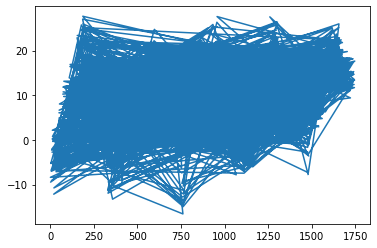

In [140]:
np.random.seed(0)
df1_train = df1_train.sample(frac=1,random_state=0)
_ = df1_train['Temp'].plot()

<h2> Selección de variables

<h3>PCA

In [148]:
X_std = preprocessing.scale(df1_train.iloc[:,:(len(df1_train.columns)-1)])

In [149]:
X_std.shape

(1749, 21)

In [150]:
i=0
for var in df1_train.columns[:(len(df1_train.columns)-1)]:
    print("{}: {}, {}".format(var, np.mean(X_std[:,i]), np.std(X_std[:,i])))
    i+=1

P.Aire.Prom: 1.926976461631844e-14, 1.0
P.Aire.Max: 1.1176118159382708e-14, 0.9999999999999999
P.Aire.Min: 9.702422462430299e-15, 1.0
P.Vapor.Prom: 9.95328589258002e-17, 0.9999999999999999
P.Vapor.Max: -5.22039688651646e-16, 1.0
P.Vapor.Min: 1.137518387723431e-16, 1.0
Hum.Rel.Prom: 4.793827491120173e-16, 0.9999999999999999
Hum.Rel.Max: -9.719688366529672e-16, 1.0
Hum.Rel.Min: 3.554744961635722e-18, 1.0
C.Vapor.Prom: 1.5437749547675133e-16, 1.0
C.Vapor.Max: 2.2344111187424534e-16, 0.9999999999999999
C.Vapor.Min: 1.3812723279498802e-16, 1.0
D.Aire.Prom: 5.425556452873721e-15, 1.0
D.Aire.Max: -2.112534148629229e-15, 1.0
D.Aire.Min: 4.318507307678597e-15, 0.9999999999999999
D.Vapor.Prom: -5.1797712298120514e-17, 1.0
D.Vapor.Max: 3.6156834466923336e-16, 1.0
D.Vapor.Min: 1.8078417233461668e-16, 1.0
Temp.Prom: 4.062565670440824e-18, 0.9999999999999999
Temp.Max: -1.828154551698371e-17, 1.0
Temp.Min: 8.531387907925731e-17, 1.0


In [151]:
pca = PCA()

In [152]:
pca.fit(X_std)

PCA()

In [153]:
pca.components_

array([[ 9.25696962e-03,  6.34455091e-02, -4.38357097e-02,
        -2.77423593e-01, -2.73866131e-01, -2.69724924e-01,
         1.64139817e-01,  1.27720016e-01,  1.53214989e-01,
        -2.77520169e-01, -2.73869470e-01, -2.69604612e-01,
         2.81550309e-01,  2.76708654e-01,  2.73856194e-01,
        -5.80085797e-02, -2.37475767e-02, -6.13736715e-02,
        -2.85214913e-01, -2.81203451e-01, -2.80815961e-01],
       [-5.77348309e-01, -5.05994569e-01, -5.20049947e-01,
         4.84259971e-03,  1.19187562e-03,  5.02558143e-03,
         1.96683367e-01,  1.85715946e-01,  1.55048100e-01,
         1.12613785e-02,  7.93830261e-03,  1.05420753e-02,
        -9.09618085e-02, -7.44381135e-02, -9.56702049e-02,
         9.64013196e-02,  1.91082387e-02,  7.97902928e-02,
        -3.52424170e-02, -3.18934622e-02, -3.69970888e-02],
       [-1.37852622e-02, -8.45155189e-02,  6.58606234e-02,
         8.66728171e-02,  6.82113038e-02,  9.57685991e-02,
         1.63107413e-01,  2.05764574e-01,  1.09894908e

In [154]:
pca.explained_variance_

array([1.21070206e+01, 2.70001127e+00, 2.32810859e+00, 1.96805392e+00,
       6.20118864e-01, 3.90678514e-01, 3.47805695e-01, 2.05530080e-01,
       1.14868252e-01, 7.00375525e-02, 5.01627566e-02, 3.64731000e-02,
       3.14619028e-02, 1.93871101e-02, 1.14112975e-02, 6.45182616e-03,
       4.22847799e-03, 9.61756898e-05, 5.72261834e-05, 4.47900949e-05,
       5.69514637e-06])

In [155]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([5.76195161e-01, 1.28498454e-01, 1.10798928e-01, 9.36632703e-02,
       2.95125861e-02, 1.85931020e-02, 1.65527064e-02, 9.78155080e-03,
       5.46678932e-03, 3.33321468e-03, 2.38733694e-03, 1.73582125e-03,
       1.49732925e-03, 9.22667878e-04, 5.43084430e-04, 3.07054157e-04,
       2.01240969e-04, 4.57717623e-06, 2.72349829e-06, 2.13164219e-06,
       2.71042388e-07])

In [156]:
X_PCA = pca.transform(X_std)

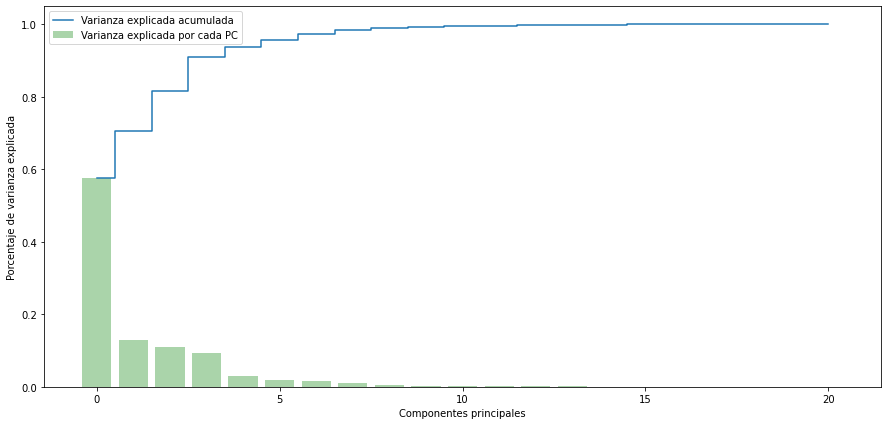

In [157]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [158]:
np.sum(pca.explained_variance_ratio_[0:2])

0.7046936144003692

In [159]:
np.sum(pca.explained_variance_ratio_[0:3])

0.8154925421666511

Encontramos que los primeros 3 componentes conservan el 81.55% de la información original. Con 2 ejes, solo ser conserva el 70.47% de la información.

In [161]:
df_pca = pd.concat([    pd.DataFrame(X_PCA[:,0:2]), df1_train[['Temp']]  ], axis = 1)
df_pca.columns=['PC1', 'PC2', 'Temp']
df_pca.head()



,PC1,PC2,Temp
0,5.776894,1.343336,-8.39
1,-4.182665,-0.947068,-9.46
2,-1.384172,0.932276,-5.28
3,-2.407097,0.968628,-5.18
4,2.759500,3.195583,-6.80


# Parte 2: Modelos convolucionales (2 puntos)

Considere los datos como una serie tiempo multivariada y utilice modelos de redes neuronales convolucionales para poder predecir la temperatura del séptimo día siguiente:

- Considere los datos como series de tiempo (no utilice modelos de forecasting como Arima o Holt-Winters, solo redes convolucionales). Debe buscar la mejor ventana de datos que le permita la mejor predicción
- Los datos deben ser transformados entonces en tensores de rango 3: (batch, ventana de tiempo, número de variables a predecir)
- Utilice filtros convolucionales de 1D. Defina una arquitectura con varias convolucionales 1D. Por ejemplo para ventanas de 60 días, se pueden definir en una primera capa 32 kernels de tamaño 3, 5, 7 días.
- Evalúe la utilidad del dropout para regularizar antes de la o las capas densas, intente varios valores.
- Evalúe la utilidad regularizar los kernels de las capas convolucionales con L1 o/y L2, intente varios valores.